# <p style="text-align:center;"> Building a Network of Landownership in Kenya </p>

### <p style="text-align:center;"> A Prototype for Extracting Structured Text Data from the Kenya Gazettes </p>


**Stanford Data Science for Social Good (DSSG) Fellows**: Thea Rossman, Tsion (T) Tesfaye, and Robbie Thompson

**DSSG faculty and technical mentors**: Mahnaz Roshanaei, Mike Sklar, Ben Stenhaug, Qijia Jiang, Michael Baiocchi, Balasubramanian Narasimhan, and Chiara Sabatti

**Code for Africa** (CfA): Allan Cheboi, Clemence Kyara, Jacopo Ottaviani, Justin Arenstein, Robin Kiplangat

**The World Resources Institute** (WRI): Kathleen Buckingham

_Special thanks to: The National Science Foundation, Microsoft Cognitive Services_

## Summary

Records of who owns, buys, and sells land in Kenya are sparse and, often, inaccessible. Journalists in Code for Africa’s network have named lack of transparency as a key barrier in investigating illegal and unjust land deals; and the World Resources Institute has identified lack of public land-ownership records as a barrier to influencing sustainable natural resource stewardship. 

This report describes a process for extracting land records from a dataset of Kenyan government publications, the Kenya Gazettes. Our pipeline translates PDF data into raw text; extracts land-related notices; uses a Named Entity Recognition (NER) model to extract names of people, companies, addresses, etc; and determines relationships between these entities, which we represent as a network. 

For segments published under the Land Registration Act, our NER model has strong performance (precision: 0.97 and recall: 0.91). Our network, constructed from 13,000+ Land Registration Act notices from 151 gazettes published between 2000 and 2019, shows clear ownership records, many of which may have been previously unavailable. 

Our model demonstrates that the Kenya Gazettes are promising sources for structured and linked text data. Future work, led by Code for Africa (CfA), the World Resources Institute (WRI), and their partners, may apply the same pipeline to land notices that we were unable to process, announcements unrelated to land, or similarly-formulated publications from other countries. 

<span style='color:blue'> 
[T: I think the summary above has a little too much detail and might be slightly confusing for a first time reader who doesn't know about our partners. Here's a suggested rephrasing that could serve as a hook encouraging the reader to read further.]
    
    
    
Records of who owns, buys, and sells land in Kenya are sparse and, often, inaccessible. This inaccessbility has resulted in the proliferation of land related corruption and presented significant barrier to investigation as well as to sustainable natural resource stewardship. 

This report aims to address this land information inaccessbility issue by extracting land record details from a dataset of Kenyan government publications called The Kenya Gazettes and making it publically available. Our process starts by translating PDF data into raw text followed by extraction of land-related notices which are then passed through a Named Entity Recognition (NER) model to extract entities such as names of people, companies, addresses, etc to eventually determine relationships between these entities and build a network. Using this process, we are able to extract, structure, and link data that was previously locked away in thousands of pages of PDFs. The detailed walkthrough of this process can be found in this [dssg-cfa-public](https://github.com/StanfordDataScience/dssg-cfa-public) github repo which is easily navigable by starting with the `README` files.

While we hope that our specific dataset will be useful, a significant output of our project is the workflow itself. Our output is a prototype, with clear and significant opportunities for extension. The Kenya Gazettes, along with similar publications in other countries, are a rich and largely untapped data source. We hope that our project partners and others apply a similar pipeline to other government data that is currently locked away in a hard-to-access format. 
</span>

## Introduction

In 1996, billionaire Mike Maina, lawyer Chege Kirundi, and several Kenyan government officials allocated 45.5 acres of government trust land to a shell corporation associated with Kirundi and Maina. The company then sold that land back to the government and, shortly after, dissolved. In all, the deal lost Kenya’s National Social Security Fund, a core of the country’s social safety net, nearly Sh293 million.<sup>1</sup> (Journalists associated with Code for Africa helped investigate and report this story in 2019, leading to a legal investigation and a return of the funds, over 20 years later.) 

This is not an isolated incident. For over a century, elites, foreign corporations, and government officials have taken acres of land from public trust, private ownership, expired leases, and local stewardship. Corruption in the lands ministry is systemic; Transparency International, an anti-corruption watchdog group, ranked it as “one of the most corrupt institutions" in Kenya.<sup>2</sup> The famous 2004 Ndung’u Report, from the Commission of Inquiry into the Illegal/Irregular Allocation of Public land, called for mass repossession, investigation, and prosecution.<sup>3</sup>

It is important to note that land theft and scarcity are not indigenous to the region that is currently Kenya. The British colonial power systemitized land theft, privatizing and transferring the region's natural resources to settler control and devastating native land systems. Pre-colonization, land stewardship and use were structured through overlapping and kinship-based networks, rather than individual ownership in the European sense. Agricultural technologies managed resources sustainably, ensuring that land remained abundant and able to support life. The region's first wave of land scarcity followed the expansion of single-crop plantations, deforestation, and property laws that made seasonal migration impossible.<sup>4</sup> 

It is telling that the largest organized military anti-colonial group in the mid-20th century named themselves “The Kenya Land and Freedom Army" and that so many distinct peoples -- Kikuyu, Meru, Kamba, Masaai, South Asian-Kenyans -- unified under the demand for land redistribution.<sup>5</sup> Though Kenya gained independence in 1963, colonial land systems remained largely intact. Land transfers went to a small number, and millions of native Kenyans remained landless.<sup>6</sup>

Today, the Kenyan "land question" includes systemic land theft and corruption; wealth concentration and inequity; resource scarcity compounded by the climate crisis; and what the Kenya Land Alliance describes as "multigenerational disinheritance".<sup>7</sup> Land in Kenya, who owns and controls it, and how they manage its resources are heavy, emotive, deep-rooted and high-stakes topics. 


### Project Partners
<span style='color:blue'> How do we make this section work well with the About section without too much repetition? </span>

The originators of this project, Code for Africa and the World Resources Institute, are among the network of organizations doing long-term work in the country to build a just and sustainable land system. Both organizations have interests in acquiring more data on land -- who owns or leases it, how it is used and zoned, and suspicious transactions. 

The two organizations have distinct strategies for using this data. Code for Africa facilitates a network of investigative and data journalsits, including many based in Kenya and many working to investigate illegal land deals. As the outcome of the Maina/Kirundi case suggests, legal pathways exist for returning land and wealth gained through unjust land deals -- but building a successful case requires evidence. Journalists in this network have named lack of data as one barrier to investigations. 

The World Resources Institute's in-country offices work with corporate, government, and individual landowners to implement sustainable land management practices. Among other factors, their work is currently limited by a lack of information regarding who these landowners are and how the majority of land in Kenya is zoned and used. 

WRI and CfA shared a goal of determining what information can be extracted from government notices mandated by Kenyan transparency laws and published in the weekly government Gazette. These notices sometimes contain information about Kenya's land, who owns or leases it, and how it is used.<sup>8</sup> These data are currently buried in thousands of PDFs, searchable by keyword but not aggregated or linked. CfA and WRI believe that the Gazettes contain information that, if extracted and structured, can help to fill some of the gaps that currently exist -- to help facilitate investigations and influence land management. Representatives from both organizations proposed this project to Data Science + Social Good program in the spring of 2020. 


### Our Contribution

This report describes our pipeline for building a dataset of land records from the Gazettes, focusing on Land Registration Act notices from 2012-2019. Beginning with PDFs, scanned and uploaded by CfA’s partners, we describe our process for developing text files, dividing these files into segments to isolate Land Registration Act announcements, extracting entities from these announcements (names, addresses, land plots, etc.), and mapping connections between these entities as a network. 

Our results demonstrate that the formulaic nature of Gazette announcements lends well to modern character recognition and Natural Language Processing (NLP) tools, and that the resulting dataset offers previously inaccessible insights. In particular, aggregated and networked information reveals patterns and outliers, which a keyword search cannot; and more specific and accurate entity extraction allows for faster connections. The Gazettes, and similar publications in other countries, remain a rich and largely-unlocked data source; and CfA engineers hope to apply a similar pipeline to other announcements. 

Our code is open source and available on a [Github repository](https://github.com/StanfordDataScience/dssg-cfa-public) for others to reuse and extend. Our dataset of PDF-to-text translations of the 2000-2019 Gazettes will be available through CfA’s databases, Connected Africa and Gazeti.Africa. 


## Methodology and Pipeline

Our project can be thought of as one continuous pipeline which starts with scans of the Kenya gazettes in PDF format available online and ends with a relational dataset connecting entities within these gazettes such as people, organizations, and plots of land. The pipeline can be split fairly neatly into four sections, as pictured above. A brief description of all four sections is written below:

* **Convert PDF to Raw Text:** Craft API calls to websites containing the Kenya Gazettes. Use Microsoft Cognitive Services' Read API on these PDFs. Finally, process json output of Read API into ordered text.

* **Divide Raw Text by Notice:** Extract separate segments from ordered text. Use regular expressions as a baseline for entity extraction.

* **Extract Entities From Notice** Build a spaCy model to extract entities more accurately. 

* **Build Relationships Between Entities** Using our spaCy model, extract entities for a number of gazettes. Combine these entities into objects, and these objects into a network. Visualize the network and perform exploratory data analysis.


Our outputs are: 
1. A dataset of higher quality PDF-to-text translations of Kenya Gazettes
2. A beginning dataset of entities extracted from 2000-2019 land records (names, addresses, land plots, etc.), stored in a data schema comparable to that already implemented within Aleph, CfA’s data journalism platform. 
3. A network of these entities. 
4. Rigorous documentation, with an aim of reproducibility 

![Figure 1. Project Pipeline Graphic](util/project_pipeline.png)
*Figure 1. Project Pipeline*

### Data Source

Our pipeline extracts text data from **Land Registration Act Notices issued in the Kenya Government Gazette**. We processed all publicly-available Gazettes published between 2000 and 2019; however, since we trained our entity recognition model on L.R.A. notices, nearly all of our data is from **after 2012**, the year the act was passed. We focused only on L.R.A due to time constraints, the ubiquity of L.R.A notices in post 2012 gazettes, and the abundant landownership information contained in these L.R.A. notices.

The Kenya Gazette is a bulletin published by the Kenyan government. The weekly newspaper -- alongside occasional Special Issues -- contains notices to the public, mandated by transparency and governance laws. A sample table of contents shows announcements required by The State Corporations Act, The Mining Act, The Land Registration Act, and more. Though our prototype only works with notices related to the Land Registration Act, it is worth noting the extensive information that exists in this data source: 

![Figure 2. Gazette Table of Contents](util/table_of_contents.png)
*Figure 2. The Kenya gazettes contain a diverse set of information*

Each Gazette contains several *Notices*, generally mandated by a transparency law. Several of these relate to land, including The Land Registration Act, The Registered Land Act (in pre-2012 Gazettes), The Land Act, The National Land Commission, and the Environmental Management and Conservation Act.<sup>8</sup>. Sometimes, information about land ownership, transactions, and use exist within these Notices. 

![Figure 3. LRA Example](util/LRA_ex.png)
*Figure 3. A single Gazette Notice, as mandated by the Land Registration Act*

The Kenya Law Reporting Project has already scanned and uploaded publicly available Gazettes published between 1906 and 2019 to two online databases<sup>9, 10</sup>. We believe these databases, when combined, to be nearly comprehensive. 

Due to the scope of our project, we were only able to fully process notices mandated by the Land Registration Act and only in more recent Gazettes. We converted to text and tested our entity recognition model on all 2,261 Gazettes published between 2000 and 2019, in alignment with CfA journalists' perspectives that the most actionable data comes from the past two decades. However, since the Land Registration Act was passed in 2012, in practice, most of the data that makes it through our full pipeline is from after that year. 


![2000-2019 Gazettes](util/year_distr_2000_2019.png)
*Figure 3. Gazette Distribution*

![LRA Distribution](util/year_distr_LRA.png)
*Figure 4. Distribution of focus years*

![LRA Distribution Total](util/year_distr_LRA_notices.png)
*Figure 5. LRA Distribution of focus areas*

## Pipeline

### Step 1: Converting PDF to Raw Text

#### 1a. Original text output: Tesseract

Our original dataset contained text files generated through an open-source PDF-to-text tool, Tesseract. Unfortunately, Tesseract’s character recognition did not allow for relation extraction. In particular, **Tesseract’s inability to separate columns of text resulted in a disjointed, irregularly-ordered output**. (In a random sampling from 30 gazettes, 56% of pages contained this error.) Without an automated way of isolating individual land announcements from each other, it was impossible to intuit which entities appeared in the same sections and, thus, the relationships between them -- the core of useful insights. 

A detailed report on our work with the Tesseract text can be found in the `util` folder of our [GitHub repo](https://github.com/StanfordDataScience/dssg-cfa-public). 

**Conclusion** We believe that any relation extraction work will require ordered, higher-quality text. 

#### 1b. New text output: Microsoft Cognitive Services

Unable to meet project goals with Tesseract-generated text due to reasons described above, we used Microsoft Cognitive Services’ Read API<sup>11</sup> to generate more reliable text files from PDFs stored on Connected Africa and Gazeti.Africa. More detail regarding accessing PDFs from the online databases and interacting with Microsoft’s API may be found on our GitHub. <span style='color:blue'> I recommend adding the links to the specific folder/notebook you are referencing here </span>

The Read API outputs a JSON data structure which contains, for each identified line, the text on that line, the coordinates of where that line is located on the page, and confidence ratings for each word in the line. Identified lines include reliable column separation. 

**However** The primary limitation of the Read API itself is that it does not identify tables. Since the information relevant to our project is nearly all in paragraph form, we used the Read API because of its lower cost and equivalent performance on text. However, significant information exists in tables that may be valuable for future projects with different scopes.<sup>12</sup> <span style='color:blue'> The reader may wonder "so what?" </span>


#### 1c. Read API JSON Output to Raw Text

We processed this Read API output, turning text and geometric information into ordered paragraphs using a k-means algorithm to identify columns and concatenating text. Our approach clusters the left side of the bounding boxes by x coordinate, increases the number of centroids to a relatively stable state, and uses the minimum number of centroids to represent the columns on the page. <span style='color:blue'> I think Chiara will have a lot of questions here. </span>

This approach reliably identifies two-column pages with paragraphs of text, which make up much of the Kenya gazettes. It occasionally fails on two-column pages with embedded tables and more often on tables with more than 4 columns.



<img src="util/pdf_scan.png" alt="PDF scan" width="200"/> 
<p style="text-align:center;">  Figure 6. PDF scan (full page) </p>
<img src="util/bounding_boxes.png" alt="Bounding Boxes" width="300"/>
<p style="text-align:center;">Figure 7. Bounding Boxes (full page)</p>
<img src="util/raw_text.png" alt=" Raw Text" width="200"/> 
<p style="text-align:center;">Figure 8. Raw Text (portion of the page)</p>
    

### Step 2: Raw Text to Isolated Segments

The above page depicted in Figure 8 has eight segments related to land, each of which is a stand-alone and self-contained notice. Our later relation extraction relies on analyzing each of these 'segments,' as we will refer to them, in isolation. 

The highly structured nature of the Kenya Gazettes allowed us to apply regular expressions to determine the coordinates at which a segment begins and ends. 

The primary limitation is that we sometimes lose segments that span multiple pages, when a segment begins on a two-column page, like the one above, and ends on a page that includes tables or vice cersa. We err on the side of caution, and throw away segments which we suspect get corrupted by being read over multiple pages

<img src="util/table_and_text_pg.png" alt="Figure 9. Page with Table and Text" width="200"/> 
<p style="text-align:center;">Figure 9. Page with Table and Text (full page)</p>

Even though this page shown in Figure 9 contains neat paragraphs in the bottom half, it won’t get read because our scripts won’t be sure how many columns it has. It gets confused by the table on top mixed with paragraphs on the bottom.

Despite these limitations, we were able to extract and segment a significant number of Land Registration Act notices. These notices were mostly free of typos and clearly segmented that we proceeded to Step 3: Extracting Named Entities.

### Step 3: Land Segments to Structured Data: Extracting Named Entities

Framing: After obtaining text data, we extracted entities mentioned in land-related sections and mapped the relationships between these entities. The Named Entity Recognition (NER) is conducted using [spaCy](https://spacy.io/usage/spacy-101), which is a free, open-source library for advanced natural language processing in Python. 

As mentioned in the _Methodology and Pipeline_ section, this project only focuses on the Land Registration Act (LAR) as published in the Kenyan Gazettes between 2012 and 2019. There are a total of 25 entities we would like to extract from the LAR notices. These entities are: 



1. Gazette Notice No.
2. Title
3. Subtitle
4. Second subtitle
5. Owner(s) name
6. Owner(s) ID number
7. Owner(s) p.o. box number
8. Owner(s) city
9. Owner(s) country
10. Ownership status
11. Land title deed status
12. Buyer(s) name
13. Buyer(s) p.o. box number
14. Buyer(s) city
15. Buyer(s) country
16. Land identification
17. Land location
18. Land size
19. Land registration
20. Grant Number
21. Date this announcement was published
22. Signator
23. Role of signator
24. Location of Signator
25. MR Number (for recent publications)

**Procedure**
Our team decided to use `spaCy` to conduct this entity recognition due to the following four reasons:


1. `spaCy` provides a strong default NER system that identifies entities such as Person, Organization, and Date.
2. `spaCy` is easily customizable. A modified model can easily be trained using custom training sets. We used Land Registration Act notices to train a model that recognizes entities such as "Land Size" and "Land Registration Number."
3. `spaCy` has ample support online.
4. `spaCy` is free and open source hence it would not place constraints on our partners' financial resources.

Other tools considered to conduct this extraction and their respective shortcomings are documented [in this document](https://github.com/StanfordDataScience/dssg-cfa-public/blob/master/C_build_ner_model/A_train_modified_spacy_model.ipynb).


We will take a closer look at #2: Training a default model. 

The spacy default model has high accuracy in detecting default entities such as “PERSON” and “DATE”. Six out of the 25 entities (Owner(s) name, owner(s) city, owner(s) country, buyer(s) name, buyer(s) city, buyer(s) country) we want to extract from the Land Registration Act notices are such default entities. We have to find another way to extract the remaining 20 entities. It turned out that regular expressions (regex) are best suited for extracting nine of the remaining entities. These nine entities best suited for regex extraction are Gazette Notice No., Title, Subtitle, Second subtitle, Date this announcement was published, Signator, Role of signator, Location of Signator, MR Number (for recent publications). These nine entities are each printed on their own line and come either at the very beginning or at the very end of a section. Since the Microsoft Optical Character Recognition reads notices one line at a time, it was more convenient to extract these nine entities using regex and their position.

To recap, six of the 25 entities are extracted using the default spaCy model while nine others are extracted using regex. We trained a modified spaCy model to extract the remaining 10 entities.


**Modified Model Training**
We trained the model using 6286 Land Registration Act notices from 80 different gazettes published 2012 - 2019. The code for the training process is a bit involved to print here but it is documented in detail in this notebook present on the public repo: [`A_train_modified_spacy_model.ipynb`](https://github.com/StanfordDataScience/dssg-cfa-public/blob/master/C_build_ner_model/A_train_modified_spacy_model.ipynb). Essentially, the process starts by loading the modified labels to be used as a training set. The training set should provide sufficient examples of the entities the model needs to identify. Note that these examples do not need to be perfect. For instance, some of our 6286 notices provided examples for the custom entity `Land Size` while others provided examples for `Land Registration Number`. This process will provide the model with labelled training data that contain custom entities. Note that the training examples need to be provided in the form `[TEXT, {'entities': (START_CHAR, END_CHAR, LABEL)}]`.

Note that providing a model with a training set of labelled custom entities is not sufficient. Training a model in spaCy suffers from a catastrophic forgetting
problem described [here](https://explosion.ai/blog/pseudo-rehearsal-catastrophic-forgetting). In short, when we train a spaCy NER model, it starts from scratch and only learns the entities in the training example. Hence, if our training example is only made up of custom entities such as `Land Size`, the model only learns these custom labels and forgets the default labels such as `Person` and `Date`. 

To counteract this catastrophic forgetting problem, we run each training example through the default `spaCy` model using the following lines of code:



In [ ]:
import spacy

default_label_trainings = []

# Loop through each example in the modified label trainings set, tokenize the example, 
# extract its entities, and append to the default_label_trainings list in the desired tuple/dict format
for example in modified_label_trainings:
    text = example[0]
    reinfocing_nlp_model = spacy.load("en_core_web_sm")
    doc = reinfocing_nlp_model(text)
    ents = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    default_label_trainings.append((text, {'entities': ents}))


As a result, a notice will have default entities such as `Person` as well as modified entities such as `Land Size.’ The output of this process will be training examples with the format `[TEXT, {'entities': (START_CHAR, END_CHAR, LABEL)}]` containing default as well as modified labels. Now we are ready to train the model.


In [ ]:
# Change this directory to where you would like the output of the model to be stored
local_output_dir = '/home/dssg-cfa/notebooks/dssg-cfa-public/C_build_ner_model/model_outputs/'

A_spacy_model_training_helper.trainModifiedNERModel(training_data=all_training_data, all_labels=all_labels, model=None, new_model_name="modified_ner_model_on_gazettes", output_dir=local_output_dir, n_iter=150)



Model training is complete.

**Testing the Model**

Load the model and choose the desired number of test Land Registration Act notices that were not used in the training set. A recommended testing plan is outlined in [this notebook](https://github.com/StanfordDataScience/dssg-cfa-public/blob/master/C_build_ner_model/B_test_modified_spacy_model.ipynb) that can be found on the DSSG-CfA public github repo.



**Results**

 We tested the model using twenty randomly selected notices from 70 gazettes which contain 4967 Land Registration Act notices. The model had an overall precision of 0.97 and recall of 0.91. Our team found these performances to be satisfactory since it showed a significant improvement from the precision of 0.89 and a recall of 0.85 of the former model. Evaluating the model on each entity showed that the lowest performing entities are `Person` (0.861 precision and 0.969 recall), `Ownership Status` (1.000 precision and 0.800 recall), `Land size` (1.000 precision and 0.833 recall), and `Land Registration` (1.000 precision and 0.800 recall).

We have identified why these four entities perform the lowest and we have recommended specific improvement strategies in the [B_test_modified_spacy_model.ipynb](https://github.com/StanfordDataScience/dssg-cfa-public/blob/master/C_build_ner_model/B_test_modified_spacy_model.ipynb) notebook which can be found on the public DSSG-CfA GitHub page. These suggestions can further improve the performance of the current model. For now, our team is satisfied with the current performance of the trained model and will proceed to the network visualization section.



### Step 4: Structured Data to Visualizing Connections: Building the Network

Once we extracted entities from the text, we drew connections between them in order to create a network of land ownership in Kenya. We then visualized this network and identified individuals of interest.

Before building a network, we extracted relationships between the entities we found in the previous step. First we grouped extracted entities together into objects that have real-world meaning. The four types of objects which make up our network are individuals, organizations (primarily companies), plots of land, and ownership stakes. 

Next we built relationships between these objects. For this model, we used very simple rules, assuming that an individual and a plot of land appearing together in a land-related segment (such as one under the header "The Land Registration Act") are in fact related in some fashion. Other such rules used in building this network are described in the `networkInfrastructure.ipynb` notebook.


Here is a sample outcome of the network constructed in [Gephi](https://gephi.org/) (the visualization platform) using this approach. One can use their preferred tool to visualize the network.




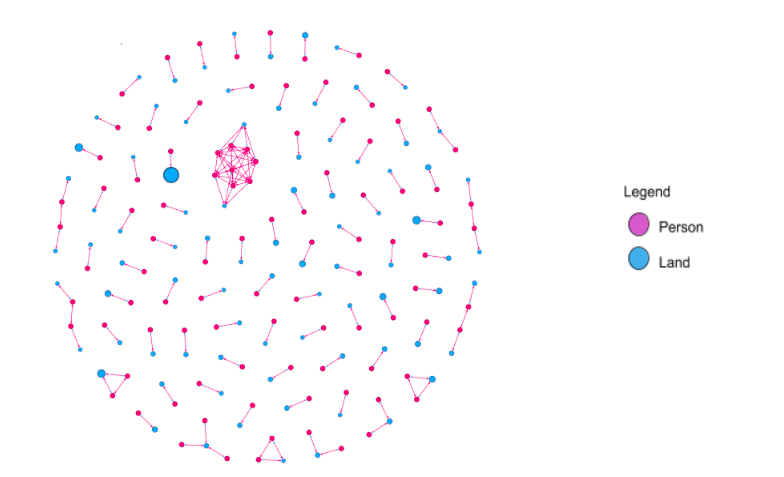

In [6]:
from PIL import Image
Image.open("util/gephi_sample_network.png")

*Figure 10. A sample network visualization of gazette entries*

This outcome shows the various ownership relationships that exist between persons and lands. The size of the blue nodes indicates the size of the land. As we can see in the above figure, there is one land that has the largest size. Also, the figure shows that most lands have one owner while a few other lands have multiple owners. The cluster of multiple entities in the center of the figure show a number of individuals who share the same address. 

Visualizing networks using this approach helps reveal some insights for instance if there is one person node surrounded by numerous land nodes. However, visualizing all the Land Registration Act related notices results in a complicated network that is not productive to decipher visually. Hence, we recommend running exploratory data analysis (EDA) on this data using another tool such as R or Python. 

We conducted such an EDA on the entities and discovered that a company called Mitithiru Company Limited has re-obtained land deeds for 21 different properties. This company was one of the outliers in our research. Note that we are conscious of the fact that we do not have all the necessary local facts to determine if this company is indeed suspicious or regular. Instead, we recommend someone with the local context to conduct further analysis on our network output and use their local knowledge to identify persons, organizations, or properties that should be investigated further.


## Conclusion

Applying modern natural language processing techniques to Land Registration Act notices from the Kenya Gazettes, we are able to extract, structure, and link data that was previously locked away in thousands of pages of PDFs. We achieved this beginning with Microsoft Cognitive Services Optical Character Recognition (OCR) PDF-to-text translations and scripts for ordering and segmenting text, we trained a custom Named Entity Recognition model to recognize entities and the relationships between them. 

Unlike existing tools that allowed for keyword searches, our resulting dataset had the added ability to detect patterns from aggregated information. While text search tools allow a journalist to open an investigation by searching for a name across documents, our structured network allows exploratory data analysis to reveal outliers and clusters. The network tool also reduces the manual work required to search for entities, improves search accuracy, and can be easily integrated with other datasets.

While we hope that our specific dataset will be useful, a significant output of our project is the workflow itself. Our output is a prototype, with clear and significant opportunities for extension. The Kenya Gazettes, along with similar publications in other countries, are a rich and largely untapped data source, with Land Registration Act notices representing a small fraction of available information. We hope that Code for Africa, the World Resources Institute, and others apply a similar pipeline to other government data that is currently locked away in a hard-to-access format. 


## About

**Code for Africa (CfA)** is the largest civic technology, open data, and data journalism initiative on the African continent. 

The group is more a distributed network than a centralized organization. Core staff anchor a coalition of civic data and civic technology organizations, as well as an involved membership of individuals — “journalists, technologists, data scientists, and change makers”. 

Read more on [Medium](https://medium.com/code-for-africa), [GitHub](https://github.com/CodeForAfrica/), [Twitter](https://twitter.com/Code4Africa), and [Facebook](https://www.facebook.com/CodeForAfrica). 

**The World Resources Institute (WRI)** is a global research organization developing policy and practice for sustainable natural resource governance. Local satellites work with corporate and government leaders to reshape land, water, and climate management — with the mission of seeding an environment able to provide for the needs and aspirations of current and future generations. 

Read more on the [WRI website](https://www.wri.org), including [this page](https://www.wri.org/our-work/topics/africa) describing their Africa-based offices. 

**The Data Science for Social Good Program** at Stanford (DSSG) partners teams of undergraduate and graduate students with governments and non-profits to implement data science projects. The goals of the program are, first, to produce impactful data science projects; and, second, to train aspiring researchers, with the support of advanced graduate student and faculty mentors. 

DSSG runs for 8 weeks during the summer. The program is anchored at Stanford’s Data Science Institute, in network with similar programs at peer institutions, and has received generous support from the National Science Foundation. Read more on the DSSG [website](https://dssg.stanford.edu).

**Student fellows**

As of August 2020,

*Tsion (T) Tesfaye* is pursuing a master’s degree in statistics (data science track) at Stanford. She is particularly interested in the intersection of data science and design thinking to build innovative systems for purpose-driven companies. Her hobbies include reading autobiographies, exploring post-impressionist paintings and youth development projects.

*Thea Rossman* is an incoming master’s student in Computer Science at Stanford, where she just finished a B.A.S. in Mathematical & Computational Science and Ethnic Studies. She is interested how anti-oppression frameworks can influence public data systems. She loves speculative fiction and fantasy books, math education, and youth organizing.

*Robbie Thompson* is a junior at Stanford University studying Mathematical and Computational Science. He is particularly interested in quantitative methods in social science. Robbie’s hobbies include barefoot running and pickup basketball.

## Endnotes

[1]: Joseph Wangui, “NSSF loses Sh293m in shady land deal done 24 years ago,” *The Daily Nation*, January 4, 2020.

[2]: Katy Migiro, “Kenya to ‘purge’ land ministry of corrupt cartels: official,” *Reuters*, October 12, 2016.
Republic of Kenya Ministry of Environment and Forestry, *Taskforce Report on Forest Resources Management and Logging Activities in Kenya*, 2018.

[3]: Ndungu Commission, *Report of the Commission of Inquiry into the Illegal/Irregular Allocation of Public Land*, Nairobi, Kenya, June 30, 2003. National Land Commission of the Republic of Kenya, “FAQ’s”, Accessed 8/20/2020. https://www.landcommission.go.ke/article/faqs

[4]: Karuti Kanyinga, "Re-distribution from Above: The Politics of Land Rights and Squatting in Coastal Kenya," 2000. Commissioned and produced under the auspices of the Nordic Africa Institute’s programme “The Political and Social Context of Structural Adjustment in Sub-Saharan Africa”. http://nai.diva-portal.org/smash/get/diva2:271584/FULLTEXT01.
Peter Veit, "Focus on Land | Brief: History of Land Conflicts in Kenya," *Focus on Land in Africa*. http://www.focusonland.com/fola/en/countries/brief-history-of-land-conflicts-in-kenya/

[5]: Richard Dowden, "State of Shame:
New evidence reveals the horrors of British colonial repression in studies from David Anderson and Caroline Elkins, Histories of the Hanged and Britain's Gulag (Book Review)," *The Guardian*, February 4th, 2005.

[6]: The Truth, Justice, and Reconciliation Commission of Kenya, "Final Report - TJRC Report Volume 2A," May 3rd, 2005. https://digitalcommons.law.seattleu.edu/cgi/viewcontent.cgi?article=1001&context=tjrc-core

[7]: "The Kenya Land Alliance Case Study," *Human Rights, Power, and Civic Action in Developing Societies: Comparative Analyses (RIPOCA)*. Funded by the Norwegian Research Council, Poverty and Peace Research Programme (February 2010). 
Miriam Gathigah, "Weak Laws and Capitalist Economy Deplete Kenya’s Natural Wealth," *IPS News*, April 2014. 
Bamuturaki Musinguzi, "How Do We End Conflict over E. Africa's Natural Resources?" *Global Policy Forum*, December 25, 2011. 

[8]: For a list of relevant land laws and the Gazette notices associated, see this document compiled by CfA: [“CfA, iLab, Stanford, Documentation, Land Legislation”](https://docs.google.com/document/d/1d-XGtYYbDdDFWph5ap_hMBsSKSfyCgRvuy5wcZvYihA/).]

[9]: National Council for Law Reporting (Kenya Law), *Connected Africa*. https://data.connectedafrica.net/

[10]: OpenGazettes Universe, *gazeti.Africa*. https://gazeti.africa

[11]: Documentation for the Read API may be found [here](https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/concept-recognizing-text).

[12]: Though we did not implement it within our prototype, we have included instructions on our GitHub for using the Form Recognizer Layout API, also from Microsoft, for reliably extracting information from tables in the Gazettes. We believe that this will be necessary for reliably extracting information from tables, though there may be a strategy that we have not considered to create tables from the Read API output. Documentation for the Form Recognizer Layout API may be found [here](https://docs.microsoft.com/en-us/azure/cognitive-services/form-recognizer/overview).

The slides from our presentation are viewable [here](https://docs.google.com/presentation/d/1Woemfb5ZEkEiuj0ur1kxc2wPZMX1eq8XO3wtRAVQ-Jk/edit?usp=sharing).

In [ ]:
#THE END#